04_11_get_EXIPlanet_info

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, scipy, astropy, astroquery, photutils,  exotic, ccdproc, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name=version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

https://github.com/rzellem/EXOTIC

In [6]:
import importlib, sys, subprocess
packages = "exotic, bokeh, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        print(f"**** module {pkg} is being installed")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
    else: 
        print(f"**** module {pkg} is installed")

%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

**** module exotic is being installed
**** module bokeh is installed
**** module version_information is installed
This notebook was generated at 2025-01-10 12:21:30 (KST = GMT+0900) 
0 Python     3.7.12 64bit [GCC 9.4.0]
1 IPython    7.33.0
2 OS         Linux 6.8.0 51 generic x86_64 with debian trixie sid
3 exotic     The 'exotic' distribution was not found and is required by the application
4 bokeh      2.4.3
5 version_information 1.0.4


### import modules

In [1]:
from astroquery.simbad import Simbad

# Customize the output columns.
Simbad.add_votable_fields('typed_id', 'flux(V)') 

# Perform the query.
result_table = Simbad.query_object("HD189733b")

# Print or process the results.
print(result_table)


 MAIN_ID         RA           DEC      ...  TYPED_ID FLUX_V SCRIPT_NUMBER_ID
              "h:m:s"       "d:m:s"    ...            mag                   
---------- ------------- ------------- ... --------- ------ ----------------
HD 189733b 20 00 43.7129 +22 42 39.073 ... HD189733b     --                1


In [2]:
result_table.colnames

['MAIN_ID',
 'RA',
 'DEC',
 'RA_PREC',
 'DEC_PREC',
 'COO_ERR_MAJA',
 'COO_ERR_MINA',
 'COO_ERR_ANGLE',
 'COO_QUAL',
 'COO_WAVELENGTH',
 'COO_BIBCODE',
 'TYPED_ID',
 'FLUX_V',
 'SCRIPT_NUMBER_ID']

In [7]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/ASTRO_data") 
PROJECDIR = Path("/mnt/Rdata/ASTRO_data/2024-EXO")
TODODIR = PROJECDIR / "_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
TODODIR = PROJECDIR / "_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
TODODIR = PROJECDIR / "RiLA600_STX-16803_-_1bin"
TODODIR = PROJECDIR / "RiLA600_STX-16803_-_2bin"

# PROJECDIR = Path("/mnt/Rdata/ASTRO_data/2022-Asteroid")
# TODODIR = PROJECDIR / "GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "RiLA600_STX-16803_-_2bin"

# PROJECDIR = Path("/mnt/Rdata/ASTRO_data/2023-Asteroid")
# TODODIR = PROJECDIR / "GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "RiLA600_STX-16803_-_2bin"

# PROJECDIR = Path("/mnt/Rdata/ASTRO_data/2016-Variable")
# TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = Path("/mnt/Rdata/ASTRO_data/2017-Variable")
# TODODIR = PROJECDIR / "-_-_-_2017-_-_RiLA600_STX-16803_-_2bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
MASTERDIR = Path(BDFDIR[0]) / _astro_utilities.master_dir
if not MASTERDIR.exists():
    os.makedirs("{}".format(str(MASTERDIR)))
    print("{} is created...".format(str(MASTERDIR)))

print ("MASTERDIR: ", format(MASTERDIR))

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = '2023-12-'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/-_CAL-BDF_-_2024-05_-_-_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HD189733b_LIGHT_-_2024-06-27_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/Kepler-17b_LIGHT_-_2024-06-26_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/TrES-1b_LIGHT_-_2024-06-09_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/TrES-1b_LIGHT_-_2024-06-18_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/TrES-4b_LIGHT_-_2024-06-13_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/WASP-103b_LIGHT_-_2024-06-06_-_RiLA600_STX-16803_-_2bin/']
len(DOINGDIRs):  8
MASTERDIR:  /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803

In [5]:
# DOINGDIRs = DOINGDIRs[1:2]
# print("DOINGDIRs:", DOINGDIRs)

DOINGDIRs: [PosixPath('/mnt/Rdata/ASTRO_data/2024-EXO/GSON300_STF-8300M_-_1bin/Qatar-1b_LIGHT_-_2024-05-29_-_GSON300_STF-8300M_-_1bin')]


In [5]:
#####################################################################
# Observed location
LOCATION = dict(lon=127.005, lat=37.308889, elevation=101)
Suwon =  EarthLocation(lon=127.005 * u.deg, 
                                 lat=37.308889 * u.deg, 
                                 height=101 * u.m)
observatory_code = "P64"

# Used for any `astropy.SkyCoord` object:
SKYC_KW = dict(unit=u.deg, frame='icrs')

#######################################################
# Initial guess of FWHM in pixel
FWHM_INIT = 6

# Photometry parameters
R_AP = 1.5*FWHM_INIT # Aperture radius
R_IN = 4*FWHM_INIT   # Inner radius of annulus
R_OUT = 6*FWHM_INIT  # Outer radius of annulus

Mag_Low = 11.5
Mag_High = 15

Mag_target = 12.5
Mag_delta = 2
ERR_Minimum = 0.5
#######################################################

In [1]:
from exotic.api.ew import ExoplanetWatch
from IPython.display import display, Image

# This will load the results JSON from the link above
EW = ExoplanetWatch()
print(EW.target_list)

# names are case and space sensitive
# result = EW.get('WASP-1 b')
result = EW.get('HAT-P-32 b')

# list the result properties
result.__dict__.keys()

Loaded 495 targets
['CoRoT-11 b', 'CoRoT-14 b', 'CoRoT-18 b', 'CoRoT-1 b', 'CoRoT-27 b', 'CoRoT-29 b', 'CoRoT-2 b', 'CoRoT-3 b', 'CoRoT-5 b', 'CoRoT-6 b', 'CoRoT-7 b', 'CoRoT-8 b', 'CoRoTID 223977153 b', 'EPIC 206042996 c', 'Gaia-1 b', 'Gaia-2 b', 'GJ 1214 b', 'GJ 3470 b', 'GJ 436 b', 'GJ 806 b', 'GJ 9827 b', 'GPX-1 b', 'HAT-P-11 b', 'HAT-P-12 b', 'HAT-P-13 b', 'HAT-P-14 b', 'HAT-P-16 b', 'HAT-P-17 b', 'HAT-P-18 b', 'HAT-P-19 b', 'HAT-P-1 b', 'HAT-P-20 b', 'HAT-P-21 b', 'HAT-P-22 b', 'HAT-P-23 b', 'HAT-P-24 b', 'HAT-P-25 b', 'HAT-P-26 b', 'HAT-P-27 b', 'HAT-P-28 b', 'HAT-P-29 b', 'HAT-P-30 b', 'HAT-P-32 b', 'HAT-P-33 b', 'HAT-P-34 b', 'HAT-P-36 b', 'HAT-P-37 b', 'HAT-P-38 b', 'HAT-P-39 b', 'HAT-P-3 b', 'HAT-P-40 b', 'HAT-P-41 b', 'HAT-P-44 b', 'HAT-P-45 b', 'HAT-P-46 b', 'HAT-P-49 b', 'HAT-P-4 b', 'HAT-P-50 b', 'HAT-P-51 b', 'HAT-P-52 b', 'HAT-P-53 b', 'HAT-P-54 b', 'HAT-P-55 b', 'HAT-P-56 b', 'HAT-P-57 b', 'HAT-P-58 b', 'HAT-P-59 b', 'HAT-P-5 b', 'HAT-P-61 b', 'HAT-P-62 b', 'HAT-P-65 

dict_keys(['raw_result', 'host', 'name', 'priors', 'timestamp', 'identifier', 'reduction_count', 'observation_count', 'ephemeris', 'observations'])

In [3]:
result.priors

{'R*': {'units': 'Sol',
  'value': '1.22',
  'reference': 'Kokori%20et%20al.%202023',
  'uncertainty': '0.02'},
 'RA': {'units': 'decimal',
  'value': '31.0427614',
  'reference': None,
  'uncertainty': None},
 'Rp': {'units': 'R_Earth',
  'value': '22.19',
  'reference': 'Wang%20et%20al.%202019',
  'uncertainty': '0.5'},
 'T*': {'units': 'K',
  'value': '6207.0',
  'reference': 'Kokori%20et%20al.%202023',
  'uncertainty': '88.0'},
 'Tc': {'units': 'BJD-TDB',
  'value': '2456265.154123',
  'reference': 'Kokori%20et%20al.%202023',
  'uncertainty': '4.4e-05'},
 'DEC': {'units': 'decimal',
  'value': '46.6878512',
  'reference': None,
  'uncertainty': None},
 'Tcs': [{'units': 'BJD, BJD-TDB',
   'value': '2454420.4465775',
   'reference': 'Bonomo%20et%20al.%202017,%20Zhao%20et%20al.%202014,%20Albrecht%20et%20al.%202012,%20Hartman%20et%20al.%202011',
   'uncertainty': '0.0002405'},
  {'units': 'HJD',
   'value': '2454942.898449',
   'reference': 'Gibson%20et%20al.%202013',
   'uncertainty'

In [4]:
# list the properties
print(result.observations[0].__dict__.keys())

dict_keys(['raw_observation', 'name', 'files', 'filter', 'obscode', 'identifier', 'secondary_obscodes', 'errors', 'parameters', 'lightcurve_url', 'posterior_url'])


In [5]:
# print the best-fit parameters
result.observations[0].parameters

{'u0': 2.556299761900263,
 'u1': -4.597821549510019,
 'u2': 4.71447441116587,
 'u3': -1.6729525533049712,
 'ecc': 0.16,
 'inc': 89.0,
 'omega': 50.0,
 'duration': 0.1278,
 'tmid': 2455942.655,
 'a1': 1.0009,
 'a2': -0.0006,
 'ars': 5.425,
 'rprs': 0.146,
 'per': 2.1500082}

In [6]:
time, flux, fluxerr, airmass, airmasscorr = result.observations[0].get_data()

Text(0, 0.5, 'Rel. Flux')

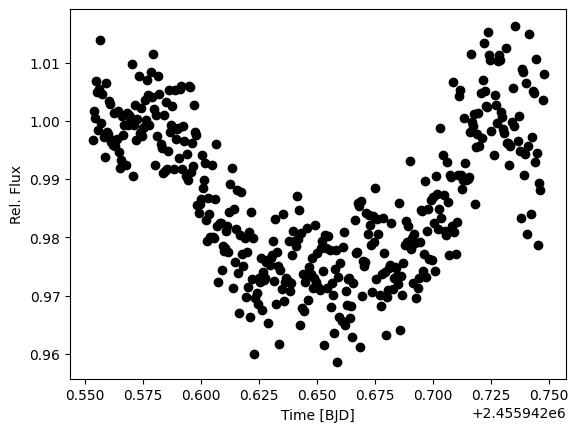

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(time, flux/airmasscorr, 'ko')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

Checking exotethys database...
    Done!
Checking ephemerides database...
    Done!
Checking photometry database...
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    Done!
    

Text(0, 0.5, 'Rel. Flux')

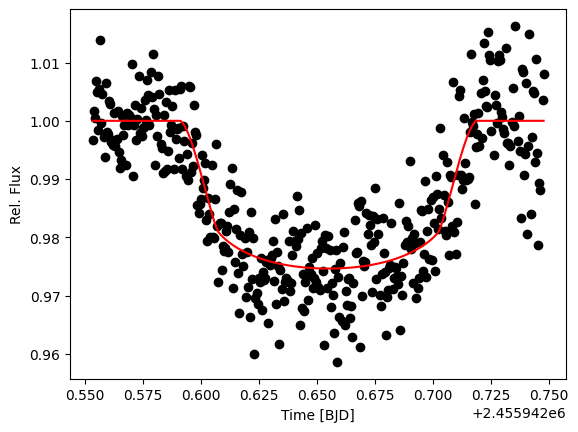

In [8]:
	
# let's over plot the transit model too
from exotic.api.elca import transit

plt.plot(time, flux/airmasscorr, 'ko')
plt.plot(time, transit(time, result.observations[0].parameters), 'r-')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

In [ ]:
	
from exotic.api.elca import lc_fitter

# only define bounds for the "free" parameters during fitting
mybounds = {
    # [lower, upper]
    'rprs':[0,0.2],
    'tmid':[ result.ephemeris['Tc']-0.02,
             result.ephemeris['Tc']+0.02],
    'a2':[-0.5,0.5] # airmass curvature
}

myfit = lc_fitter(time, flux, fluxerr, airmass,
                  result.observations[0].parameters, # priors
                  mybounds, mode='ns' )  # ns = nested sampling, slow but robust + posteriors
                                         # lm = levenberg mardquart, fast but no uncertainties

In [2]:
for DOINGDIR in DOINGDIRs[:1] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

    READINGDIR = DOINGDIR / _astro_utilities.reduced_dir
    READINGDIR = DOINGDIR / _astro_utilities.reduced_nightsky_dir

    DIFFPRESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_DPhot_Mag{Mag_target}"

    # print(str(DOINGDIR.parts[-2]) == "RiLA600_STX-16803_-_1bin")
    # if str(DOINGDIR.parts[-2]) == "RiLA600_STX-16803_-_1bin" :
    #     DOINGDIR = DOINGDIR / _astro_utilities.reduced_nightsky_dir
    # print(str(DOINGDIR.parts[-2]) == "GSON300_STF-8300M_-_1bin")
    # if str(DOINGDIR.parts[-2]) == "GSON300_STF-8300M_-_1bin" :
    #     DOINGDIR = DOINGDIR / _astro_utilities.reduced_dir

    # if not INSTRESULTDIR.exists():
    #     os.makedirs("{}".format(str(INSTRESULTDIR)))
    #     print("{} is created...".format(str(INSTRESULTDIR)))
    
    csv_in_dir = sorted(list(DIFFPRESULTDIR.glob('*result_photometry.csv')))
    #print("fits_in_dir", fits_in_dir)
    print("len(fits_in_dir)", len(csv_in_dir))
    

NameError: name 'DOINGDIRs' is not defined

In [7]:
df = pd.DataFrame()
for fpath in csv_in_dir[:]:
    fpath = Path(fpath)
    print(f"starting... {fpath}")
    df_csv = pd.read_csv(fpath)
    df = pd.concat([df, df_csv], axis=0)
    

starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-12-19-58_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv
starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-12-27-02_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv
starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-12-34-07_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv
starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-12-41-11_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv


starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-12-48-15_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv
starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-12-55-20_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv
starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-13-02-24_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv
starting... /mnt/Rdata/ASTRO_data/2024-EXO/RiLA600_STX-16803_-_2bin/HAT-P-37b_LIGHT_-_2024-06-28_-_RiLA600_STX-16803_-_2bin/reduced_nightsky_DPhot_Mag12.5/HAT-P-37b_LIGHT_R_2024-06-28-13-09-28_210sec_RiLA600_STX-16803_-17c_2bin_result_photometry.csv


In [9]:
df_csv

,Unnamed: 0,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,...,merr_ann,RAJ2000,DEJ2000,filename,t_start,t_expos,t_middle,filter,y0,V_magnitude
0,0,1,54.532263,42.984030,6.068693e+06,23088.334612,278.537953,2245.0,13.0,193427.922668,...,0.009005,304.374035,65.493486,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,9.762392
1,1,2,1266.509148,42.833161,6.202427e+06,24027.977498,271.722451,2258.0,8.0,88051.377805,...,0.019909,303.629452,65.487922,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,10.616849
2,2,3,1675.860845,44.888568,6.174492e+06,24128.417626,271.075777,2251.0,10.0,34557.396113,...,0.050621,303.378175,65.484689,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,11.632337
3,3,4,2015.060216,46.339962,6.372913e+06,24163.505846,280.159245,2250.0,7.0,224049.572726,...,0.007947,303.170041,65.481764,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,9.602829
4,4,5,635.846039,53.504670,6.212310e+06,24009.747070,271.308481,2259.0,8.0,102573.065857,...,0.017099,304.016937,65.488569,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,10.451106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,172,830.401771,2454.124258,6.042310e+06,23500.699934,258.522950,2254.0,10.0,62109.831073,...,0.027753,303.926070,64.875734,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,10.995789
172,172,173,482.471091,2455.521530,6.010676e+06,23268.075507,266.652323,2252.0,6.0,89672.310852,...,0.019243,304.135037,64.876892,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,10.597044
173,173,174,1734.294233,2459.199434,6.080307e+06,23484.584057,267.819557,2234.0,27.0,104207.884788,...,0.016658,303.383590,64.869151,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,10.433938
174,174,175,88.835449,2489.590498,5.863757e+06,22635.355632,268.511135,2256.0,8.0,103760.401921,...,0.016462,304.371739,64.869568,Qatar-1b_LIGHT_V_2024-05-29-14-57-34_180sec_GS...,2024-05-29T14:57:34.789,180.0,2024-05-29T14:59:04.789,V,-22.97869,10.438610


In [8]:
print(len(df_csv))
df_csv
print(len(df))
df

867
137574


,Unnamed: 0,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,...,t_expos,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,R_magnitude,RAJ2000,DEJ2000,V_magnitude
0,0,1,12.731777,5.566650,4.010129e+06,17284.414472,121.046208,795.0,10.0,-388218.393161,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,NaN,283.670328,51.694644,NaN
1,1,2,1510.409918,8.652715,4.464316e+06,17449.023116,112.133780,1350.0,5.0,24080.206261,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,14.849306,283.638185,51.179101,NaN
2,2,3,164.490804,10.340680,4.430597e+06,17390.216213,118.607688,1376.0,20.0,5326.306713,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,16.487391,283.669513,51.642329,NaN
3,3,4,529.834940,13.633180,4.559450e+06,17429.901042,111.620678,1472.0,12.0,124080.890442,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,13.069195,283.663021,51.516513,NaN
4,4,5,31.221037,18.205094,4.420145e+06,17286.439298,123.331204,1493.0,31.0,21281.561202,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,14.983448,283.676925,51.688100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,862,863,1808.178808,2025.070726,4.720551e+06,18370.256457,120.903643,1731.0,19.0,45890.519316,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.953233,51.039975,13.761384
863,863,864,1502.092523,2030.203431,4.640015e+06,18414.761259,116.784326,1556.0,17.0,-45970.743257,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.966824,51.145071,NaN
864,864,865,1602.914476,2032.281709,4.697651e+06,18390.780092,120.248336,1503.0,11.0,17767.400020,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.964401,51.110368,14.791631
865,865,866,1796.304459,2032.317564,4.692974e+06,18376.773207,118.595890,1493.0,20.0,16654.868473,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.957612,51.043894,14.861838


In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'xcenter', 'ycenter', 'aperture_sum', 'msky',
       'sky_std', 'nsky', 'nrej', 'flux_star', 'flux_err', 'mag_ann',
       'merr_ann', 'filename', 't_start', 't_expos', 't_middle', 'filter',
       'zeropt_med', 'zeropt_avg', 'e_zeropt', 'R_magnitude', 'RAJ2000',
       'DEJ2000', 'V_magnitude'],
      dtype='object')

In [10]:
df.drop(columns=['Unnamed: 0', 'id'], axis=0)
# df.drop(['Unnamed: 0', 'id'], axis=0)
df.reset_index(inplace=True)
df

,index,Unnamed: 0,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,...,t_expos,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,R_magnitude,RAJ2000,DEJ2000,V_magnitude
0,0,0,1,12.731777,5.566650,4.010129e+06,17284.414472,121.046208,795.0,10.0,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,NaN,283.670328,51.694644,NaN
1,1,1,2,1510.409918,8.652715,4.464316e+06,17449.023116,112.133780,1350.0,5.0,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,14.849306,283.638185,51.179101,NaN
2,2,2,3,164.490804,10.340680,4.430597e+06,17390.216213,118.607688,1376.0,20.0,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,16.487391,283.669513,51.642329,NaN
3,3,3,4,529.834940,13.633180,4.559450e+06,17429.901042,111.620678,1472.0,12.0,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,13.069195,283.663021,51.516513,NaN
4,4,4,5,31.221037,18.205094,4.420145e+06,17286.439298,123.331204,1493.0,31.0,...,210.0,2024-06-28T12:21:43.244,R,-25.803457,-26.052344,0.005348,14.983448,283.676925,51.688100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137569,862,862,863,1808.178808,2025.070726,4.720551e+06,18370.256457,120.903643,1731.0,19.0,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.953233,51.039975,13.761384
137570,863,863,864,1502.092523,2030.203431,4.640015e+06,18414.761259,116.784326,1556.0,17.0,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.966824,51.145071,NaN
137571,864,864,865,1602.914476,2032.281709,4.697651e+06,18390.780092,120.248336,1503.0,11.0,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.964401,51.110368,14.791631
137572,865,865,866,1796.304459,2032.317564,4.692974e+06,18376.773207,118.595890,1493.0,20.0,...,180.0,2024-06-28T19:22:41.975,V,-25.415691,-25.461915,0.010087,NaN,284.957612,51.043894,14.861838


In [11]:
EXO_coord = {"Qatar-1b":["20:13:31.6176 65:09:43.490"], 
             "Qatar-10b":["20:13:31.6176 65:09:43.490"], 
             "HAT-P-37b":["18:57:11.0562 51:16:08.849"],
             }
EXO_coord


{'Qatar-1b': ['20:13:31.6176 65:09:43.490'],
 'Qatar-10b': ['20:13:31.6176 65:09:43.490'],
 'HAT-P-37b': ['18:57:11.0562 51:16:08.849']}

In [12]:
EXO_name = "Qatar-1b"
EXO_name = "HAT-P-37b"

EXO_coord[EXO_name]

['18:57:11.0562 51:16:08.849']

In [13]:

targ_sky = SkyCoord(EXO_coord[EXO_name], 
                    frame="fk5", unit=(u.hourangle, u.deg)
                    )

targ_sky
targ_sky.ra.value[0]
type(targ_sky.ra.value[0])

coord_delta = 0.00005


In [14]:
print(df.columns)

df_star = df.loc[(df["RAJ2000"] > targ_sky.ra.value[0]*(1-coord_delta)) \
                 & (df["RAJ2000"] < targ_sky.ra.value[0]*(1+coord_delta)) \
                 & (df["DEJ2000"] > targ_sky.dec.value[0]*(1-coord_delta))\
                 & (df["DEJ2000"] < targ_sky.dec.value[0]*(1+coord_delta))]

df_star
data = df_star[['t_middle', 'filter', 'R_magnitude', 'V_magnitude', 'merr_ann']]
data

Index(['index', 'Unnamed: 0', 'id', 'xcenter', 'ycenter', 'aperture_sum',
       'msky', 'sky_std', 'nsky', 'nrej', 'flux_star', 'flux_err', 'mag_ann',
       'merr_ann', 'filename', 't_start', 't_expos', 't_middle', 'filter',
       'zeropt_med', 'zeropt_avg', 'e_zeropt', 'R_magnitude', 'RAJ2000',
       'DEJ2000', 'V_magnitude'],
      dtype='object')


,t_middle,filter,R_magnitude,V_magnitude,merr_ann
634,2024-06-28T12:21:43.244,R,13.106386,NaN,0.022989
1729,2024-06-28T12:28:47.427,R,13.259364,NaN,0.025528
2825,2024-06-28T12:35:52.573,R,12.760192,NaN,0.015376
3943,2024-06-28T12:42:56.756,R,12.877522,NaN,0.016558
5078,2024-06-28T12:50:00.943,R,13.563046,NaN,0.030467
...,...,...,...,...,...
133028,2024-06-28T18:33:10.636,V,NaN,13.413437,0.024070
134094,2024-06-28T18:47:19.544,V,NaN,14.037517,0.044823
135117,2024-06-28T19:01:28.441,V,NaN,14.512509,0.077497
136073,2024-06-28T19:15:37.477,V,NaN,13.064000,0.024633


In [15]:
df_star['t_middle_dt'] = pd.to_datetime(df['t_middle'])


/tmp/ipykernel_78780/3312728216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_star['t_middle_dt'] = pd.to_datetime(df['t_middle'])


In [16]:
df_star['t_middle_dt']

634      2024-06-28 12:21:43.244
1729     2024-06-28 12:28:47.427
2825     2024-06-28 12:35:52.573
3943     2024-06-28 12:42:56.756
5078     2024-06-28 12:50:00.943
                   ...          
133028   2024-06-28 18:33:10.636
134094   2024-06-28 18:47:19.544
135117   2024-06-28 19:01:28.441
136073   2024-06-28 19:15:37.477
137012   2024-06-28 19:22:41.975
Name: t_middle_dt, Length: 106, dtype: datetime64[ns]

In [34]:
df_star["t_middle"]

234      2024-05-29T12:08:14.152
620      2024-05-29T12:16:55.657
940      2024-05-29T12:19:45.345
1223     2024-05-29T12:28:46.672
1455     2024-05-29T12:31:52.771
1693     2024-05-29T12:40:31.267
2022     2024-05-29T12:43:23.978
2434     2024-05-29T12:52:18.749
2857     2024-05-29T12:55:06.617
3390     2024-05-29T13:03:48.428
3990     2024-05-29T13:06:42.252
4581     2024-05-29T13:15:18.299
5190     2024-05-29T13:18:15.602
6365     2024-05-29T13:39:47.936
7064     2024-05-29T13:43:03.132
7645     2024-05-29T13:52:41.012
8129     2024-05-29T13:55:34.900
9212     2024-05-29T14:07:12.078
13534    2024-05-29T12:11:38.282
13873    2024-05-29T12:14:37.336
14172    2024-05-29T12:23:09.219
14398    2024-05-29T12:26:24.873
14550    2024-05-29T12:34:59.462
14699    2024-05-29T12:38:07.090
14913    2024-05-29T12:46:50.080
15206    2024-05-29T12:50:00.455
15470    2024-05-29T12:58:31.338
15809    2024-05-29T13:01:17.900
16245    2024-05-29T13:10:01.737
16733    2024-05-29T13:12:54.625
17238    2

In [35]:
# ttime = Time(df_star["t_middle"][0])
# type(ttime)
# # len(ttime)

KeyError: 0

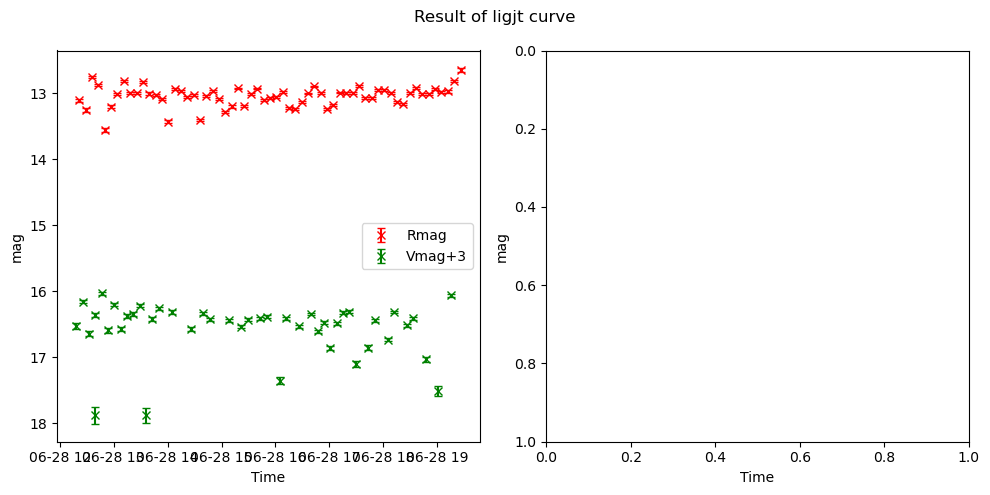

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False, gridspec_kw=None)

axs[0].errorbar(df_star["t_middle_dt"], 
            df_star['R_magnitude'], yerr=abs(df_star["merr_ann"]),
            marker='x',
            ecolor="red",
            mfc='red',
            mec='red',
            ls='none',
            #ms=10,
            capsize=3,
            label="Rmag")
axs[0].errorbar(df_star["t_middle_dt"], 
            df_star['V_magnitude']+3, yerr=abs(df_star["merr_ann"]),
            marker='x',
            # ecolor="yellow",
            # mfc='yellow',
            # mec='yellow',
            ecolor="green",
            mfc='green',
            mec='green',
            ls='none',
            #ms=10,
            capsize=3,
            label="Vmag+3")

axs[0].invert_yaxis()  
axs[0].set(
    xlabel='Time',
    ylabel="mag"
)
axs[0].legend()

axs[1].invert_yaxis()
axs[1].set(
    xlabel=f"Time",
    ylabel="mag"
)

plt.suptitle(f"Result of ligjt curve", fontsize=12,)

plt.tight_layout()
# plt.savefig(f"{DIFFPRESULTDIR}/{fpath.stem}_standardization1.png")

# plt.show()
# plt.close()

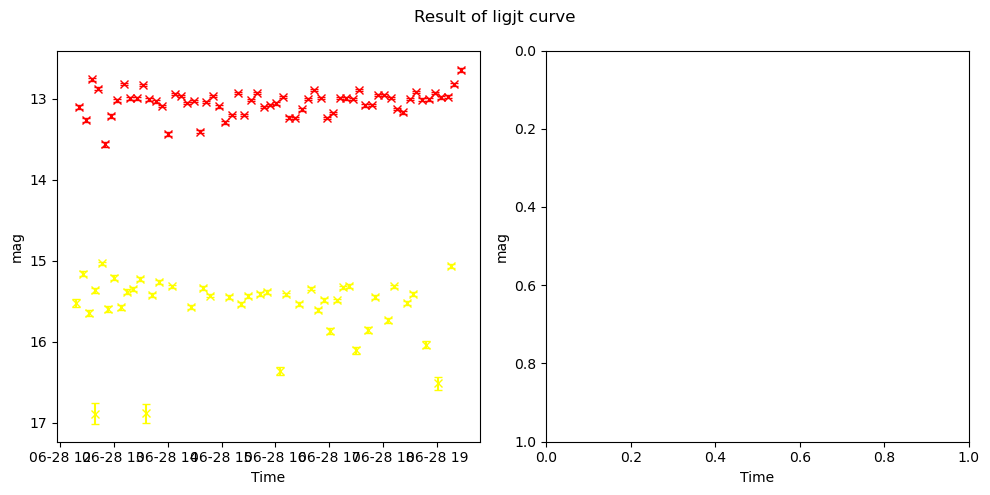

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False, gridspec_kw=None)

for idx, row in df_star.iterrows():

    axs[0].errorbar(row["t_middle_dt"], 
                row['R_magnitude'], yerr=abs(row["merr_ann"]),
                marker='x',
                ecolor="red",
                mfc='red',
                mec='red',
                ls='none',
                #ms=10,
                capsize=3,
                label="Rmag")
    axs[0].errorbar(row["t_middle_dt"], 
                row['V_magnitude']+2, yerr=abs(row["merr_ann"]),
                marker='x',
                ecolor="yellow",
                mfc='yellow',
                mec='yellow',
                ls='none',
                #ms=10,
                capsize=3,
                label="Vmag")

axs[0].invert_yaxis()
axs[1].invert_yaxis()
    
axs[0].set(
    xlabel='Time',
    ylabel="mag"
)
axs[1].set(
    xlabel=f"Time",
    ylabel="mag"
)

# axs[0].legend()
plt.suptitle(f"Result of ligjt curve", fontsize=12,)

plt.tight_layout()
# plt.savefig(f"{DIFFPRESULTDIR}/{fpath.stem}_standardization1.png")

# plt.show()
# plt.close()